# Gradient Descent Algorithm

✍ **Arjun Adhikari**, June 11, 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the Training Data

In [2]:
import os
os.chdir(r"C:\users\arjun\Desktop\workspace\machine-learning\linear-regression")
print(os.getcwd())

C:\Users\arjun\Desktop\workspace\machine-learning\linear-regression


In [3]:
dfx = pd.read_csv('./csv/linearX.csv')
dfy = pd.read_csv('./csv/linearY.csv')

In [4]:
print(type(dfx))

<class 'pandas.core.frame.DataFrame'>


Convert DataFrame object to numpy array.

In [5]:
x = dfx.values
y = dfy.values
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


### Visualization of Training data

In [6]:
# Reshape
x=x.reshape([99,])
print(x.shape)
y=y.reshape([99,])
print(y.shape)

(99,)
(99,)


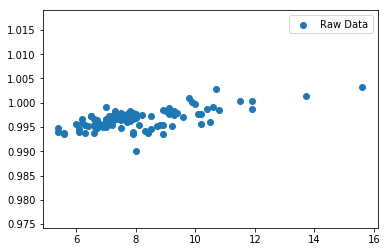

In [7]:
plt.scatter(x,y, label="Raw Data")
plt.legend()
plt.show()

Let's **normalize** the data first.

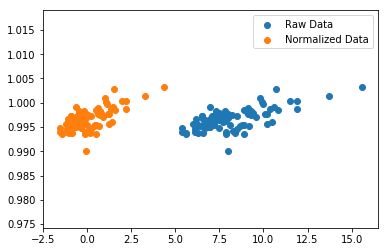

In [8]:
X = (x-x.mean())/x.std()
Y = y
plt.scatter(x,y, label='Raw Data')
plt.scatter(X,Y, label='Normalized Data')
plt.legend()
plt.show()

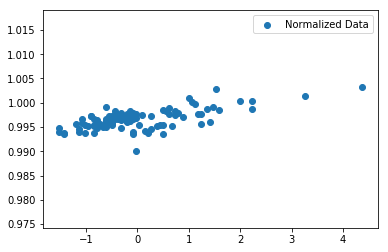

In [9]:
plt.scatter(X,Y, label="Normalized Data")
plt.legend()
plt.show()

We know,  
$h_{\theta}(X) = \theta_{o} + \theta_{1}X$

## Gradient Algorithm
- Start with random $\theta$
- Repeat until convergence.
    - Update Theta accoding to rule.

In [10]:
def hypothesis(X, theta):
    
    return theta[0] + theta[1]*X

In [11]:
def error(X, Y, theta):
    
    m = X.shape[0] # Total no of samples
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
        
    return error

In [12]:
def gradient(X, Y, theta):
    
    grad = np.zeros((2,))
    m = X.shape[0] # Total no of samples
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        grad[0] += (hx - Y[i])
        grad[1] += ((hx - Y[i])*X[i])
        
    return grad

In [13]:
def gradientDescent(X, Y, learning_rate=0.001):
    
    theta = np.zeros((2,))
    grad=np.zeros((2,))
    itr = 0
    max_itr = 100 # No of iterations to be done for training data
    error_list = []
    
    while(itr <= max_itr):
        
        grad = gradient(X, Y, theta)
        err = error(X, Y, theta)
        error_list.append(err)
        
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
        itr+=1
        
    return theta, error_list

In [14]:
final_theta, error_list = gradientDescent(X, Y)
print(final_theta)

[0.99660749 0.0013579 ]


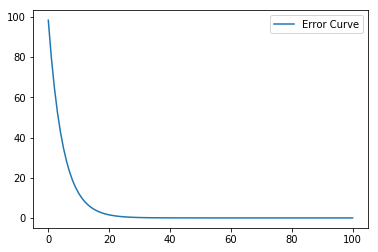

In [15]:
plt.plot(error_list, label="Error Curve")
plt.legend()
plt.show()

In [16]:
print(final_theta)

[0.99660749 0.0013579 ]


### Plot the line for testing data

In [17]:
xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


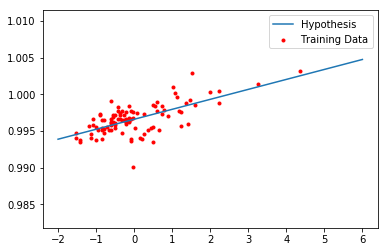

In [18]:
plt.scatter(X,Y, color='red', marker='.', label="Training Data")
plt.plot(xtest, hypothesis(xtest, final_theta), label="Hypothesis")
plt.legend()
plt.show()